# Lab e-tivity 1: Exploratory Data Analysis (EDA)

**Student:** Egberto Linhares Leal

**Task 3**

Open a new Jupyter notebook and name it etivity1.ipynb. In your own notebook, perform EDA with the bank data set by following the examples in the provided notebook “Lab 1 - Exploratory Data Analysis. ipynb”.

* Formulate a particular question that might be interesting to answer by exploring this dataset (in a markdown cell).
* Calculate statistics for the numerical and categorical attributes. Draw a short conclusion (in a markdown cell).
* Use at least two different plotting techniques to plot the distribution of some numerical attributes. Draw short conclusions (in a markdown cell).
* Generate two plots with the combined distribution of attributes and draw conclusions from them (in a markdown cell).
* Make sure your conclusions are related to the question you have formulated.

##  A. Hypothetical question for analysis:

The sales team needs to reduce the number of contacts in a new campaign due to reduced company costs. 
Analyzing the result of the previous campaign, could we target a sub-set of customers with good chances to purchase our product in a future campaign?

## B. Importing required modules and dataset

In [1]:
# - Pandas
# - Numpy
# - Matplotlib
# - Seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import dataset
df = pd.read_csv('./bank.csv')

## C. Data Exploration

In [3]:
len(df)

2000

In [4]:
# Print first 5 rows of the dataframe
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,yes,no,cellular,1,apr,479,1,307,1,failure,no


In [5]:
# Print last 5 rows of the dataframe
df.tail(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,secondary,no,6403,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


**Analysis:**

With a total of 2000, the database contains information regarding the customer, previous campaign, contact and data from the current campaign.

In [6]:
# Print statistical summary for all numerical attributes
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,1988.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,41.753018,1413.663500,13.851500,292.020500,1.909500,167.896000,2.561500
std,12.724358,3131.224213,9.712189,221.557295,1.378862,131.754126,3.400735
min,18.000000,-980.000000,1.000000,7.000000,1.000000,-1.000000,0.000000
25%,32.000000,201.500000,5.000000,146.000000,1.000000,75.750000,1.000000
50%,38.000000,551.000000,12.000000,236.000000,1.000000,182.000000,2.000000
75%,50.000000,1644.500000,23.000000,379.000000,2.000000,251.000000,3.000000
max,93.000000,81204.000000,31.000000,1823.000000,11.000000,854.000000,55.000000


**Results of the analysis:**
* The numerical data are quite complete, with only 12 records related to age missing.
* pdays and previous may not be informed, since the customer in question did not participate in the first campaign.
* Age seems to be well balanced, we can see that the mean is very close to 75%.
* Balance has a large variation, as we can see it can vary between -980 to 81,204.


## D. Data analysis of numeric data

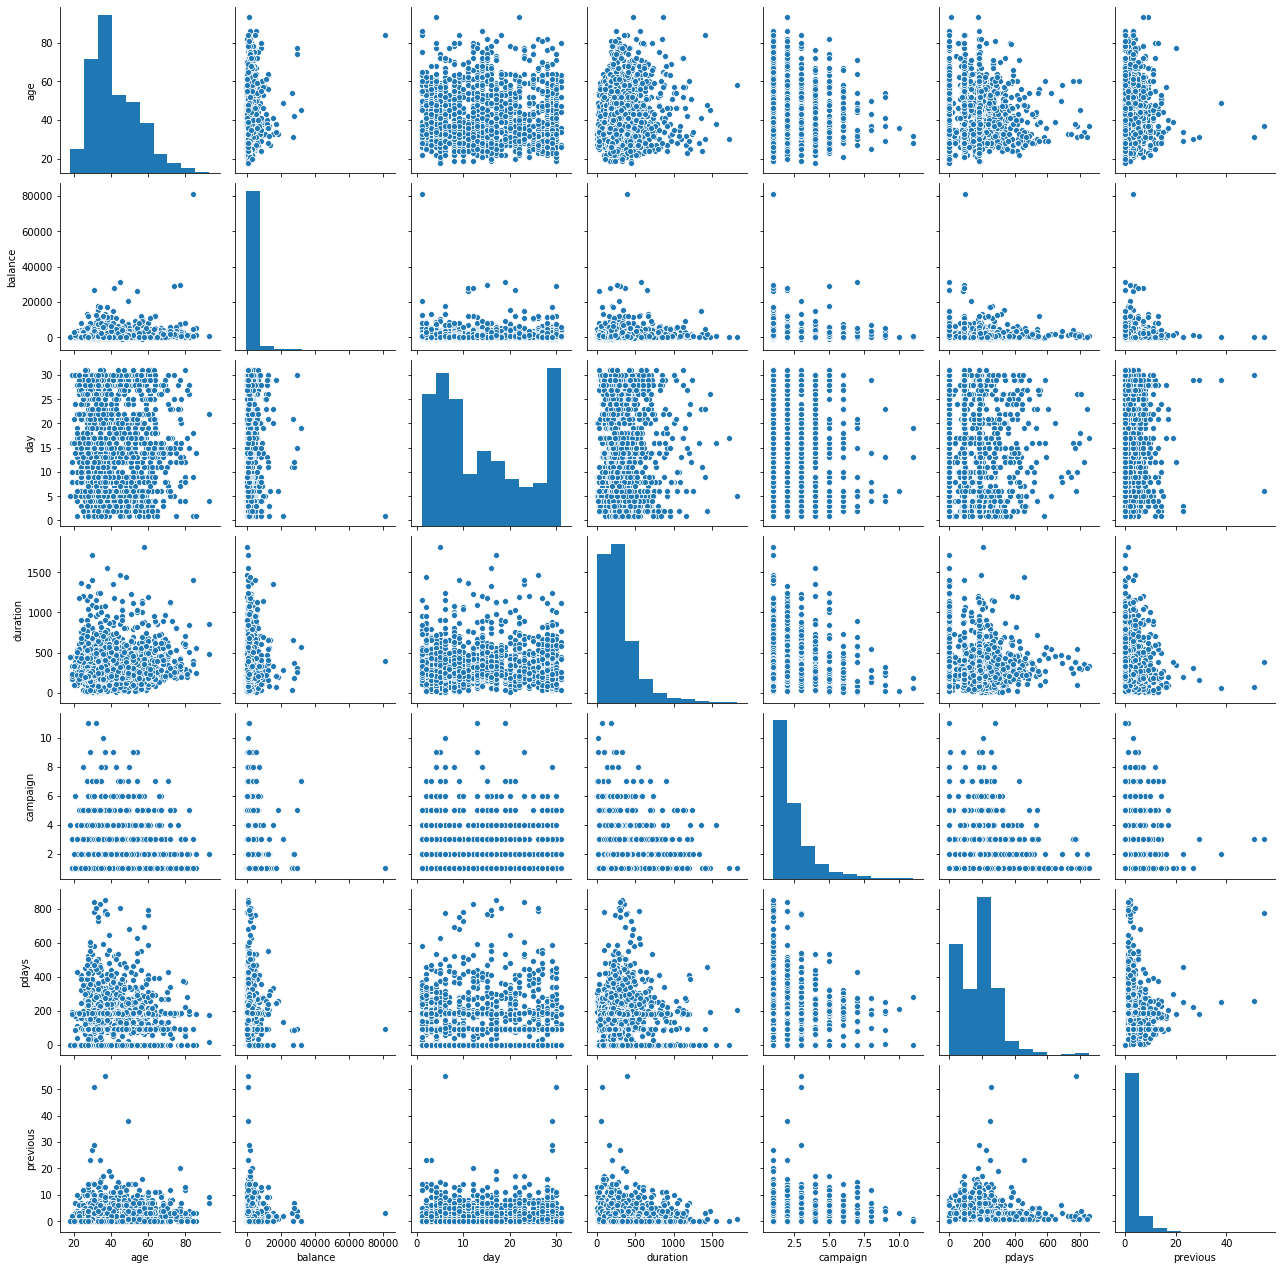

In [7]:
# note that by applying the method dropna() we drop all rows with missing values 
sns.pairplot(data=df[['age','balance','day','duration','campaign','pdays','previous']].dropna())
plt.show()

Using the pair plot we can identify some data trends that could be analyzed later

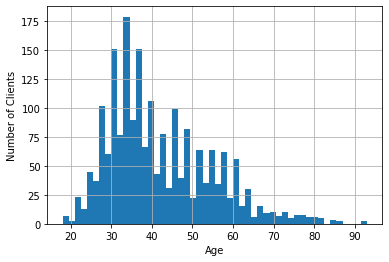

In [8]:
# Plotting a histogram of age:
df['age'].hist(bins=50)
plt.xlabel('Age')
plt.ylabel('Number of Clients')
plt.show()

**D.1 Conclusion:** 

We can see that the age distribution among campaign participants is concentrated between the ages of 30 to 60 years

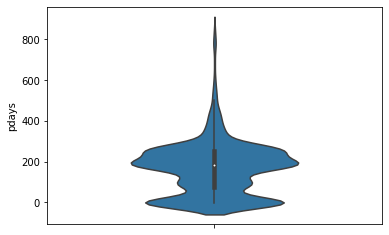

In [9]:
sns.violinplot(x=df['pdays'], orient='v', width=0.5)
plt.show()

**D.2 Conclusion:**

We can verify that the pdays(days after previous campaign) distribution is very short, with a very high concentration of balances below 400

## E. Data analysis with combined atributes

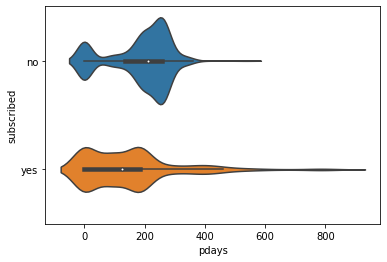

In [10]:
sns.violinplot(data=df, x='pdays', y='subscribed')
plt.show()

**E.1 Conclusion:** 

From the graph above we can see that the number of days between the last campaign and the new one can influence the customer's decision.
See that the concentration of subscribed customers has pdays less than 200.
For those who have not subscribed, we have a concentration of pdays greater than 200.

In [11]:
df['poutcome'].value_counts()

failure    955
success    444
other      147
Name: poutcome, dtype: int64

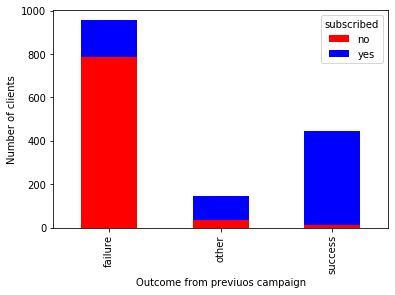

In [12]:
crosstab_CL = pd.crosstab(df['poutcome'], df['subscribed'])
crosstab_CL.plot(kind='bar', stacked=True, color=['red', 'blue'])
plt.ylabel('Number of clients')
plt.xlabel('Outcome from previuos campaign')
plt.show()

**E.2 Conclusion:**

The result of the analysis above shows that there is a strong trend among those who have had the last campaign as successful to also obtain subscription to the new campaign.
Following the same analysis, we can see that there is a great trend for the campaign to fail if the past campaign failed for that customer.

## F. Final conclusion

Considering the data analysed above, we can see that there is a strong tendency for the success of new campaigns with clients where there has been success in the past.
Another important item was the consideration of the number of days between campaigns, it was found that running the campaign in an interval of less than 200 days can bring good results.

**Final answer:**

A possibility to reduce the target group is to carry out the campaign only with clients in which we have been successful in the past, eliminating for example those we have failed (poutcome = failure), this would reduce the target group by almost half (955), thus reducing campaign costs.